## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering

In [2]:
df = pd.read_csv("insurance.csv")

## Data understanding

In [3]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [4]:
df.size

9366

In [5]:
df.shape

(1338, 7)

In [6]:
df.dtypes.value_counts()

object     3
int64      2
float64    2
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

<AxesSubplot:>

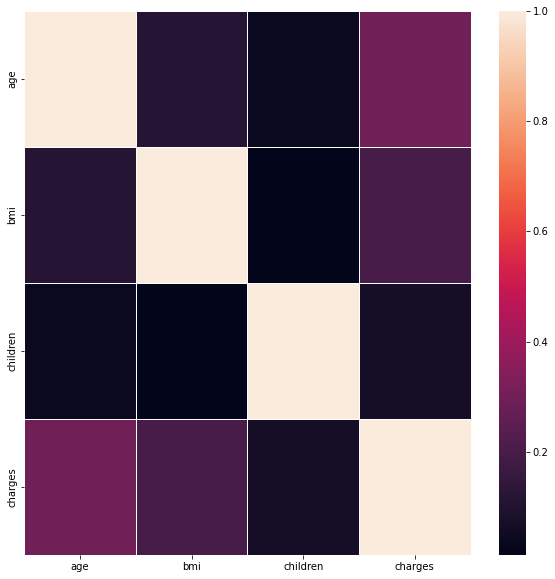

In [9]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), linewidth=1)

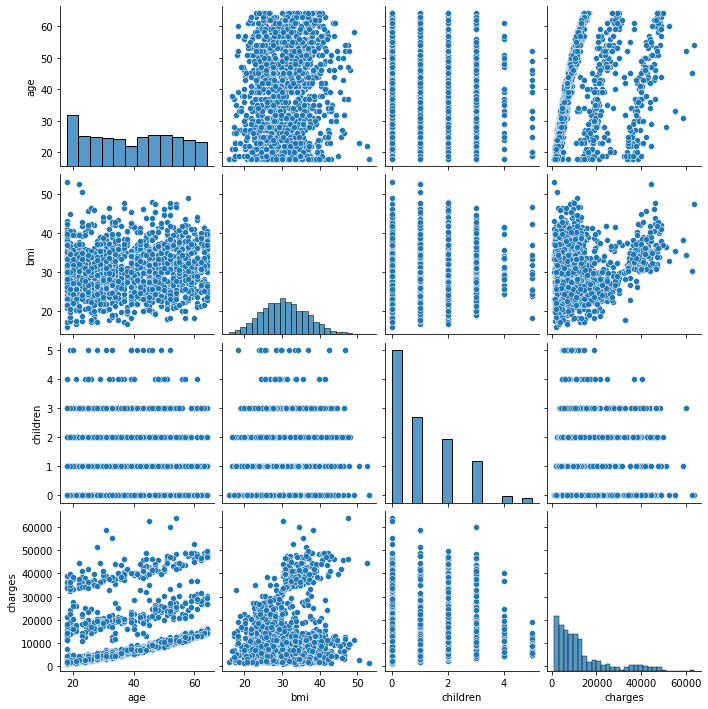

In [10]:
sns.pairplot(df)

In [11]:
df.corr()['charges'].sort_values().to_frame()

charges
children  0.067998
bmi       0.198341
age       0.299008
charges   1.000000

Age has the highest correlation but is still pretty low. I would like to see if our categorical values may have higher correlations. 

## Pre-processing

In [12]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df.sex = le.fit_transform(df.sex)
df.smoker = le.fit_transform(df.smoker)
df.region = le.fit_transform(df.region)

- Female -> 0
- Male -> 1

- Smoker no -> 0
- Smoker yes -> 1

- Region northeast -> 0
- Region northwest -> 1
- Region southeast -> 2
- Region southeast -> 3

In [13]:
df.head()

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520

In [14]:
df.dtypes.value_counts()

int64      5
float64    2
dtype: int64

<AxesSubplot:>

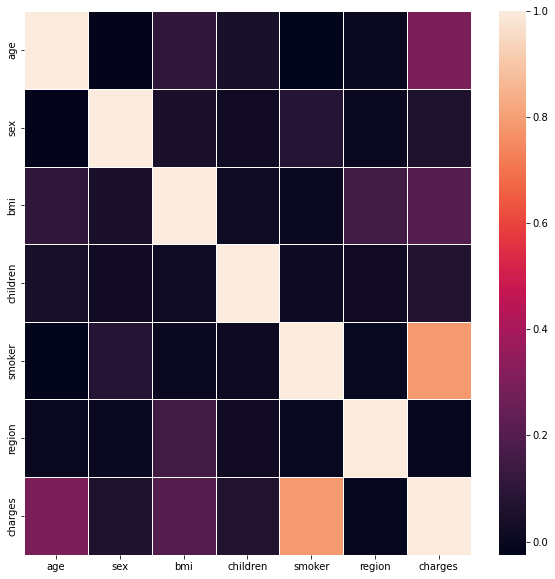

In [15]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), linewidth=1)

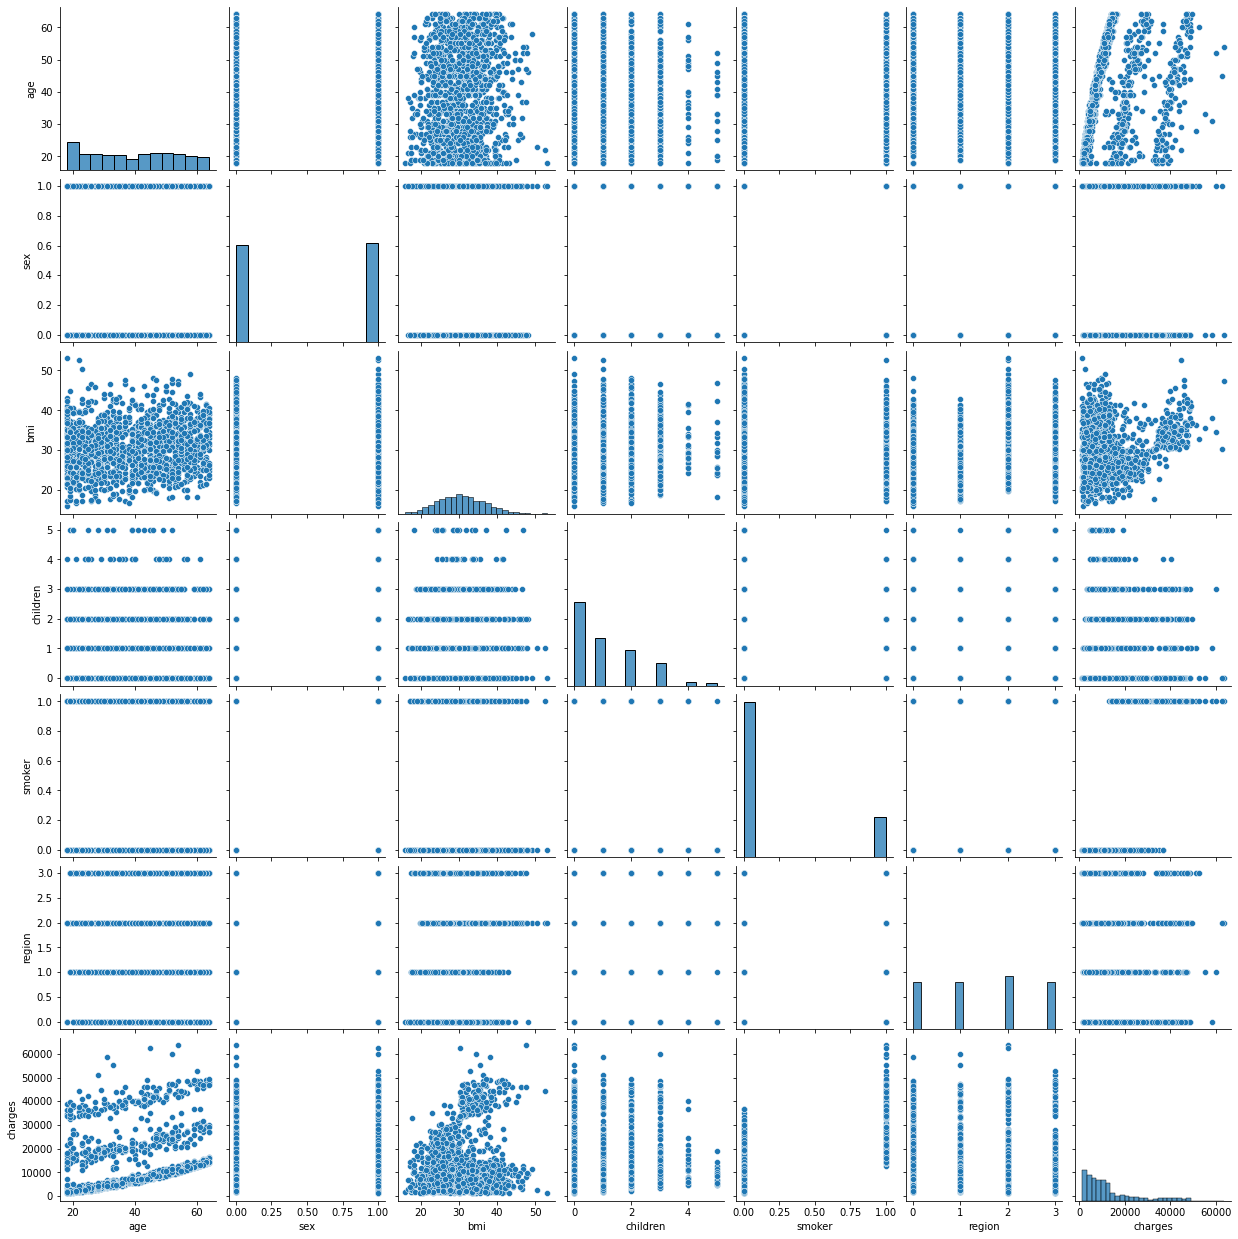

In [16]:
sns.pairplot(df)

In [17]:
df.corr()['charges'].sort_values().to_frame()

charges
region   -0.006208
sex       0.057292
children  0.067998
bmi       0.198341
age       0.299008
smoker    0.787251
charges   1.000000

Smoker has the highest correlation

## PCA

In [18]:
X = df[["age", "sex", "bmi", "children", "smoker", "region"]]

In [19]:
pca = PCA(n_components=2)
pca_mdl = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_mdl)
pca_df.head()

0         1
0 -20.336894 -1.541811
1 -20.990680  4.349017
2 -11.045077  3.002313
3  -6.663684 -7.595553
4  -7.302951 -1.375675

<AxesSubplot:xlabel='0', ylabel='1'>

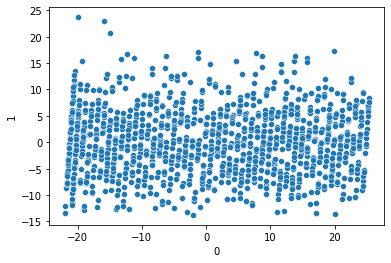

In [20]:
# initial PCA dataframe
sns.scatterplot(x = pca_df[0], y = pca_df[1])

<AxesSubplot:xlabel='0', ylabel='1'>

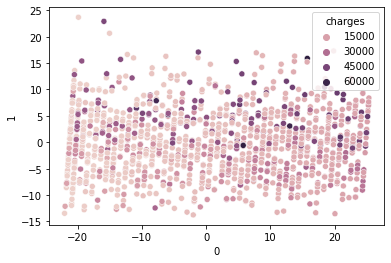

In [21]:
# charges
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df.charges)

<AxesSubplot:xlabel='0', ylabel='1'>

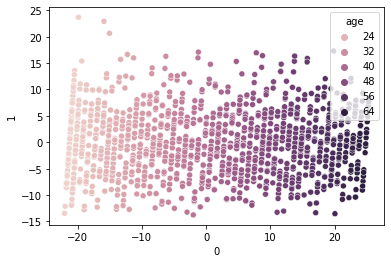

In [22]:
# age
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df['age'])

<AxesSubplot:xlabel='0', ylabel='1'>

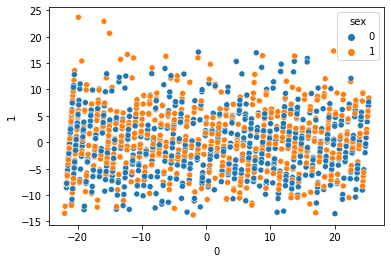

In [23]:
# sex
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df['sex'])

<AxesSubplot:xlabel='0', ylabel='1'>

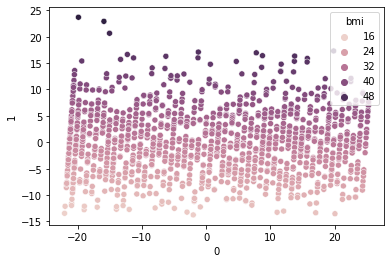

In [24]:
# bmi
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df['bmi'])

<AxesSubplot:xlabel='0', ylabel='1'>

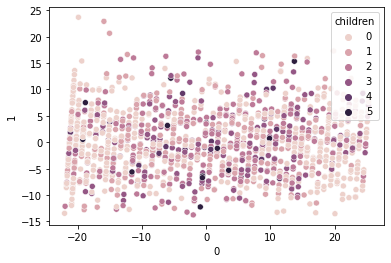

In [25]:
# children
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df['children'])

<AxesSubplot:xlabel='0', ylabel='1'>

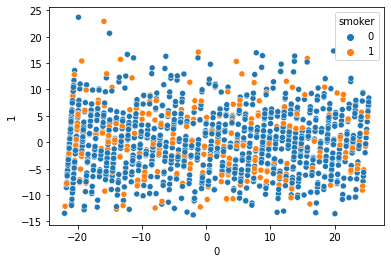

In [26]:
# smoker
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df['smoker'])

<AxesSubplot:xlabel='0', ylabel='1'>

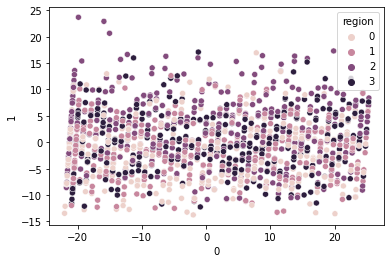

In [27]:
# region
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df['region'])

## K-Means Clustering

The elbow method is mostly used in unsupervised learning algorithms to determine the optimal number of clusters that should be used to find specific unknown groups within our population

In [28]:
inertia = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df)
    inertia.append(np.sqrt(kmeans.inertia_))

Text(0, 0.5, 'Variance')

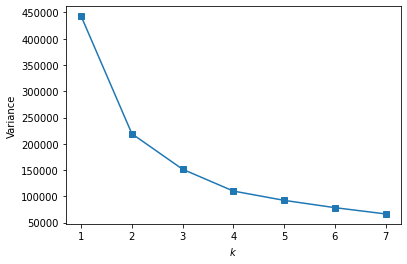

In [29]:
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('Variance')

The elbow graph shows that the optimal value for k is 2, so I will use 2 as the number of clusters.

In [30]:
kmeans = KMeans(n_clusters=2, random_state=1).fit(X)

In [31]:
y = kmeans.fit_predict(X)

<AxesSubplot:xlabel='0', ylabel='1'>

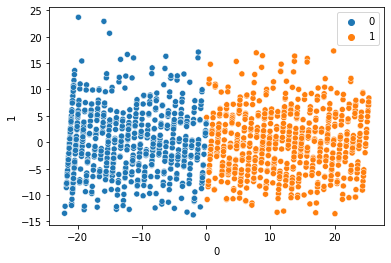

In [32]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y)

Plotting individual features

<AxesSubplot:xlabel='smoker', ylabel='charges'>

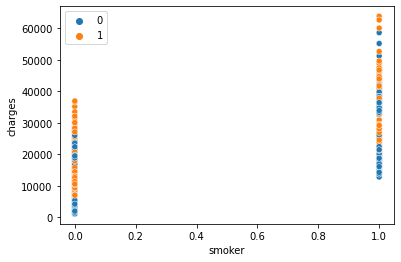

In [33]:
sns.scatterplot(x = df['smoker'], y = df['charges'], hue=y)

<AxesSubplot:xlabel='age', ylabel='charges'>

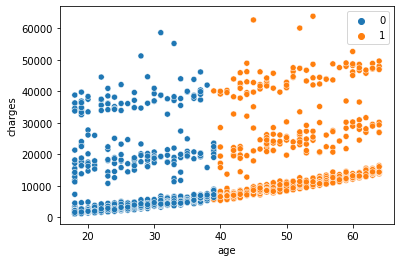

In [34]:
sns.scatterplot(x = df['age'], y = df['charges'], hue=y)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

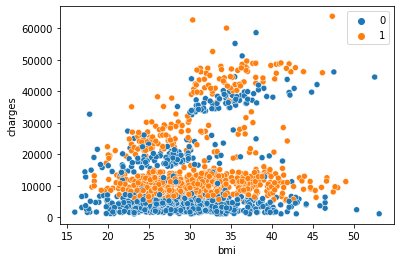

In [35]:
sns.scatterplot(x = df['bmi'], y = df['charges'], hue=y)

<AxesSubplot:xlabel='children', ylabel='charges'>

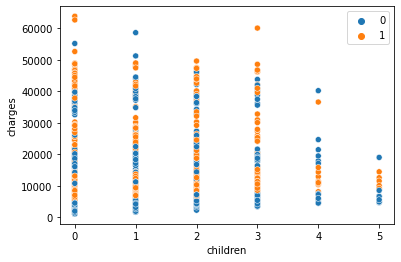

In [36]:
sns.scatterplot(x = df['children'], y = df['charges'], hue=y)

<AxesSubplot:xlabel='sex', ylabel='charges'>

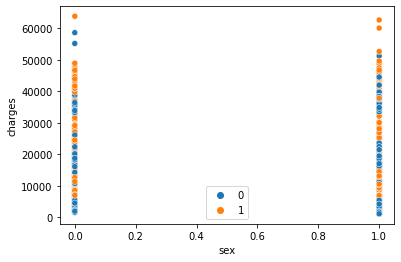

In [37]:
sns.scatterplot(x = df['sex'], y = df['charges'], hue=y)

<AxesSubplot:xlabel='region', ylabel='charges'>

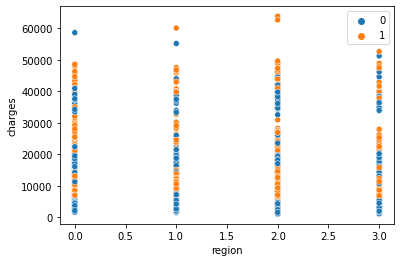

In [38]:
sns.scatterplot(x = df['region'], y = df['charges'], hue=y)

Add clusters back to the original DataFrame

In [39]:
y_df = pd.DataFrame(y, columns=['Cluster [K-Means]'])
new_df = pd.concat([df, y_df], axis=1)
new_df

age  sex     bmi  children  smoker  region      charges  \
0      19    0  27.900         0       1       3  16884.92400   
1      18    1  33.770         1       0       2   1725.55230   
2      28    1  33.000         3       0       2   4449.46200   
3      33    1  22.705         0       0       1  21984.47061   
4      32    1  28.880         0       0       1   3866.85520   
...   ...  ...     ...       ...     ...     ...          ...   
1333   50    1  30.970         3       0       1  10600.54830   
1334   18    0  31.920         0       0       0   2205.98080   
1335   18    0  36.850         0       0       2   1629.83350   
1336   21    0  25.800         0       0       3   2007.94500   
1337   61    0  29.070         0       1       1  29141.36030   

      Cluster [K-Means]  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
1333                  1  
1334                  0  
1335                  0  
1336                  0  
1337                  1  

[1338 rows x 8 columns]

Make an interactive scatterplot 

In [40]:
import plotly.express as px

In [41]:
fig = px.scatter(pd.concat([new_df, pca_df], axis = 1), 
                 x = 0, y = 1, color='Cluster [K-Means]', hover_data=["age", "sex", "bmi", "children", 
                                                            "smoker", "region", "charges"])
fig.show()

## Agglomerative Clustering

In [42]:
import scipy.cluster.hierarchy as shc

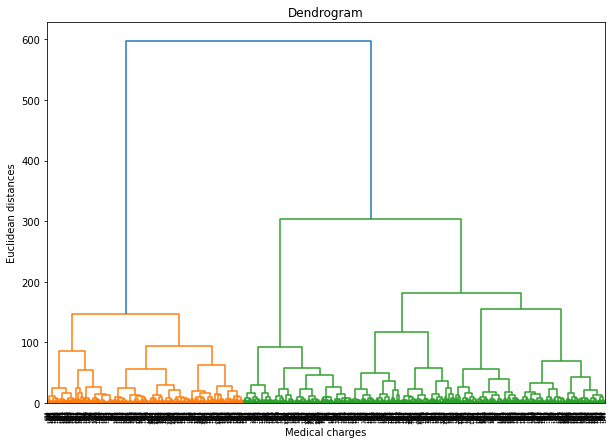

In [43]:
plt.figure(figsize=(10, 7))  
plt.title('Dendrogram')
plt.xlabel('Medical charges')
plt.ylabel('Euclidean distances')
dend = shc.dendrogram(shc.linkage(X, method='ward'))

The dendrogram shows that the optimal value for k is 2, so I will use 2 as the number of clusters.

In [44]:
agglo = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward') 

In [45]:
y_agglo = agglo.fit_predict(X)

<AxesSubplot:xlabel='0', ylabel='1'>

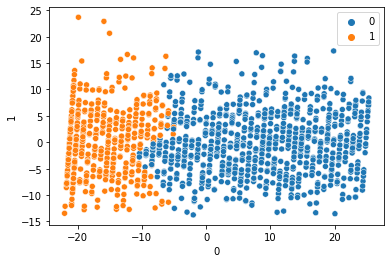

In [46]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y_agglo)

Plotting individual features

<AxesSubplot:xlabel='smoker', ylabel='charges'>

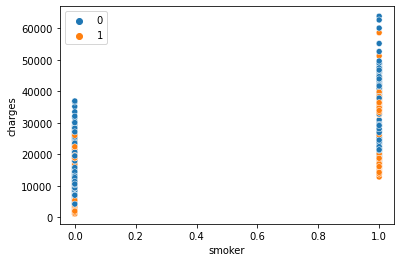

In [47]:
sns.scatterplot(x = df['smoker'], y = df['charges'], hue=y_agglo)

<AxesSubplot:xlabel='age', ylabel='charges'>

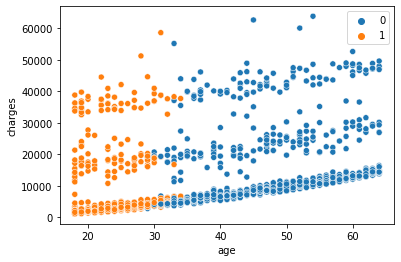

In [48]:
sns.scatterplot(x = df['age'], y = df['charges'], hue=y_agglo)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

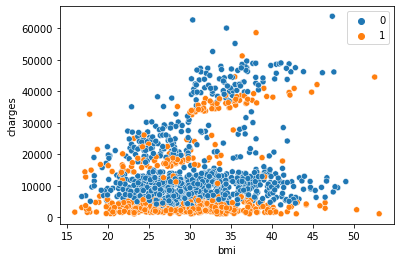

In [49]:
sns.scatterplot(x = df['bmi'], y = df['charges'], hue=y_agglo)

<AxesSubplot:xlabel='children', ylabel='charges'>

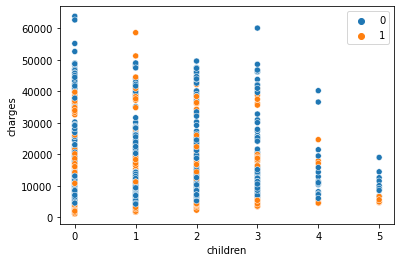

In [50]:
sns.scatterplot(x = df['children'], y = df['charges'], hue=y_agglo)

<AxesSubplot:xlabel='sex', ylabel='charges'>

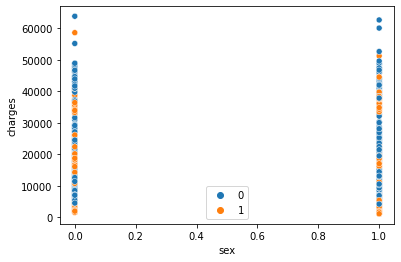

In [51]:
sns.scatterplot(x = df['sex'], y = df['charges'], hue=y_agglo)

<AxesSubplot:xlabel='region', ylabel='charges'>

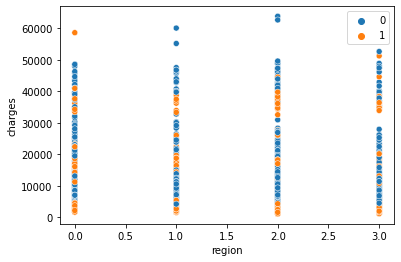

In [52]:
sns.scatterplot(x = df['region'], y = df['charges'], hue=y_agglo)

Make an interactive scatterplot

In [53]:
y_a_df = pd.DataFrame(y_agglo, columns=['Cluster [Agglomerative]'])
new_a_df = pd.concat([df, y_a_df], axis=1)

In [54]:
fig = px.scatter(pd.concat([new_a_df, pca_df], axis = 1), 
                 x = 0, y = 1, color='Cluster [Agglomerative]', hover_data=["age", "sex", "bmi", "children", 
                                                                            "smoker", "region", "charges"])
fig.show()

K-Means and Agglomerative Clustering resulted in different clusters. 

## 3D Models

In [55]:
pca3 = PCA(n_components=3)
pca_md3 = pca3.fit_transform(X)
pca3_df = pd.DataFrame(pca_md3)
pca3_df.head()

0         1         2
0 -20.336894 -1.541811 -0.898969
1 -20.990680  4.349017  0.007149
2 -11.045077  3.002313  1.969567
3  -6.663684 -7.595553 -1.073899
4  -7.302951 -1.375675 -1.095184

### K-Means

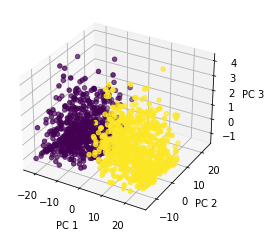

In [56]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

x = pca3_df[0]
y = pca3_df[1]
z = pca3_df[2]

ax.set_xlabel("PC 1") 
ax.set_ylabel("PC 2") 
ax.set_zlabel("PC 3")

ax.scatter(x, y, z, c = kmeans.fit_predict(pca_df))

plt.show()

### Agglomerative

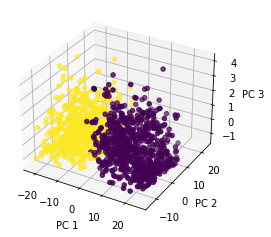

In [57]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

x = pca3_df[0]
y = pca3_df[1]
z = pca3_df[2]

ax.set_xlabel("PC 1") 
ax.set_ylabel("PC 2") 
ax.set_zlabel("PC 3")

ax.scatter(x, y, z, c = agglo.fit_predict(pca_df))

plt.show()

## Cluster Analysis

#### K-Means

In [58]:
new_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'Cluster [K-Means]'],
      dtype='object')

In [59]:
new_df['Cluster [K-Means]'].value_counts()

0    670
1    668
Name: Cluster [K-Means], dtype: int64

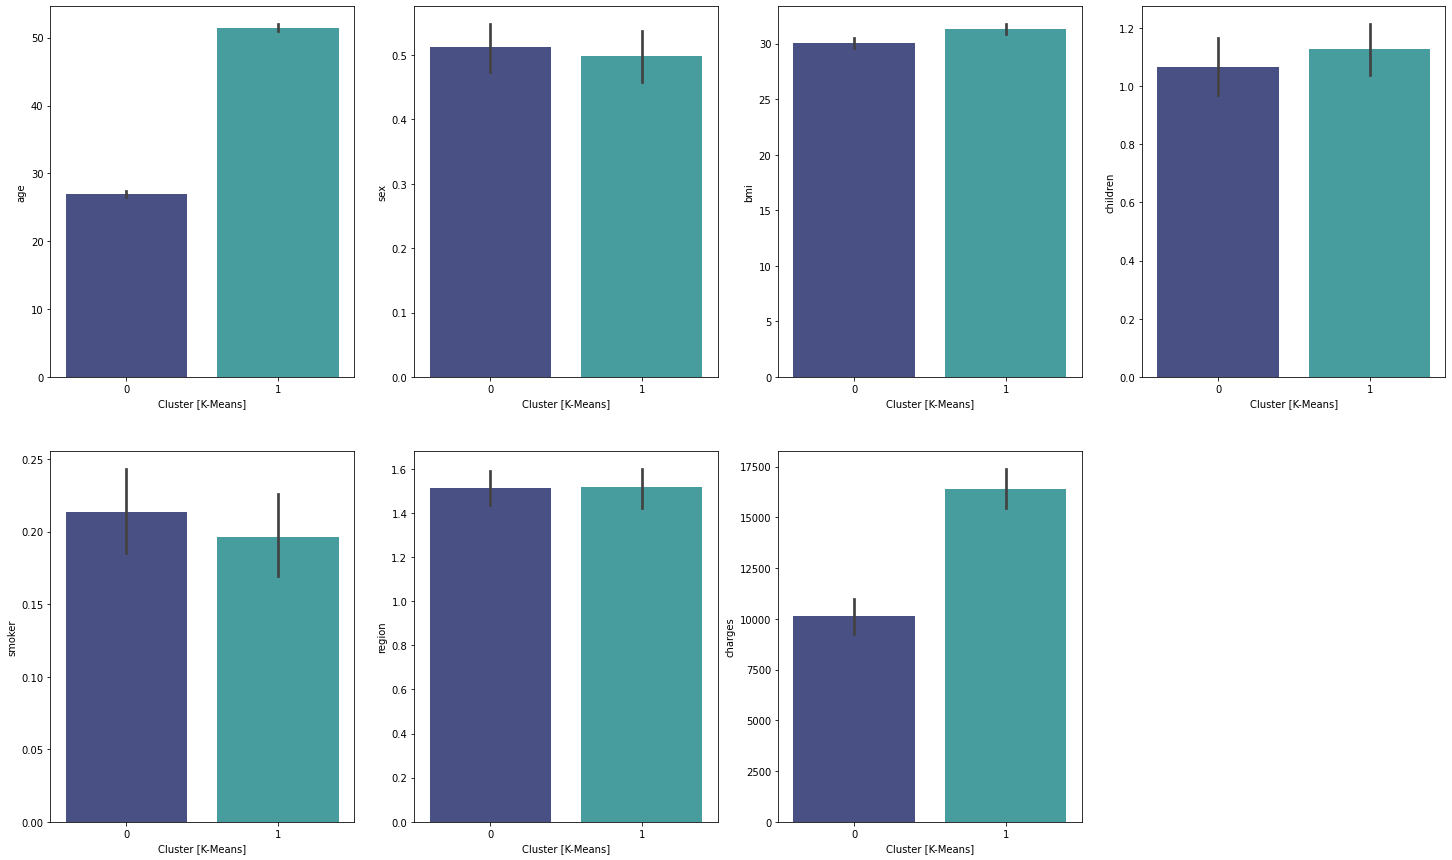

In [60]:
fig, axes = plt.subplots(2, 4, figsize=(25, 15))

sns.barplot(x=new_df['Cluster [K-Means]'], y=new_df["age"], palette = "mako", ax=axes[0, 0])
sns.barplot(x=new_df['Cluster [K-Means]'], y=new_df["sex"], palette = "mako", ax=axes[0, 1])
sns.barplot(x=new_df['Cluster [K-Means]'], y=new_df["bmi"], palette = "mako", ax=axes[0, 2])
sns.barplot(x=new_df['Cluster [K-Means]'], y=new_df["children"], palette = "mako", ax=axes[0, 3])
sns.barplot(x=new_df['Cluster [K-Means]'], y=new_df["smoker"], palette = "mako", ax=axes[1, 0])
sns.barplot(x=new_df['Cluster [K-Means]'], y=new_df["region"], palette = "mako", ax=axes[1, 1])
sns.barplot(x=new_df['Cluster [K-Means]'], y=new_df["charges"], palette = "mako", ax=axes[1, 2])
fig.delaxes(axes[1][3])

#### Agglomerative

In [61]:
new_a_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'Cluster [Agglomerative]'],
      dtype='object')

In [62]:
new_a_df['Cluster [Agglomerative]'].value_counts()

0    867
1    471
Name: Cluster [Agglomerative], dtype: int64

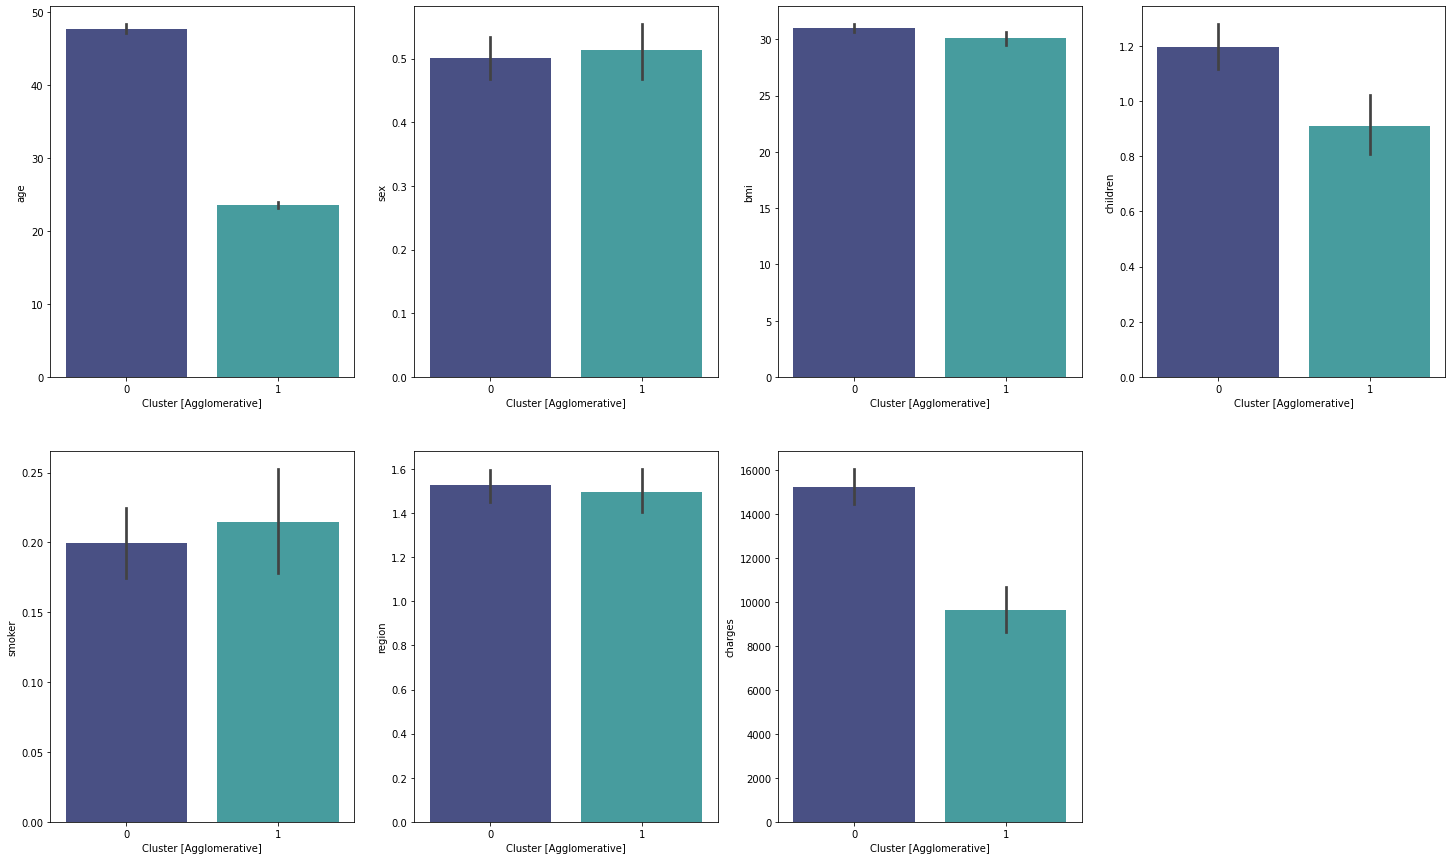

In [63]:
fig, axes = plt.subplots(2, 4, figsize=(25, 15))

sns.barplot(x=new_a_df['Cluster [Agglomerative]'], y=new_a_df["age"], palette = "mako", ax=axes[0, 0])
sns.barplot(x=new_a_df['Cluster [Agglomerative]'], y=new_a_df["sex"], palette = "mako", ax=axes[0, 1])
sns.barplot(x=new_a_df['Cluster [Agglomerative]'], y=new_a_df["bmi"], palette = "mako", ax=axes[0, 2])
sns.barplot(x=new_a_df['Cluster [Agglomerative]'], y=new_a_df["children"], palette = "mako", ax=axes[0, 3])
sns.barplot(x=new_a_df['Cluster [Agglomerative]'], y=new_a_df["smoker"], palette = "mako", ax=axes[1, 0])
sns.barplot(x=new_a_df['Cluster [Agglomerative]'], y=new_a_df["region"], palette = "mako", ax=axes[1, 1])
sns.barplot(x=new_a_df['Cluster [Agglomerative]'], y=new_a_df["charges"], palette = "mako", ax=axes[1, 2])
fig.delaxes(axes[1][3])